In [97]:
import numpy as np
import sys
import os
trial = 'a' #sys.argv[1]
lindex = 3 #sys.argv[2]
available_ram = 8.0
a = 0.3 # particle radius 
lset = list(round(i*a,2) for i in range(1,11)) # set of all l values
lval = lset[lindex] # the l value expected in the filename
# obtain all filenames associated with the simulation 'trial' having a specified l value lval from lset associated to the index lindex you passed to the concatenator
filenames = [f for f in os.listdir('.') if ( f.endswith('.npy') and f.split('flow')[1].split('_')[1].split('-')[0]==trial and float(f.split('-')[1].split('_')[1])==lval)]
filenames = []
for f in os.listdir('.'):
    if ( f.endswith('.npy') and f.split('flow')[1].split('_')[1].split('-')[0]==trial and float(f.split('-')[1].split('_')[1])==lval) and ('CAT' not in f):
        filenames.append(f)
# sort all filenames associated with the trial you want to concatenate
filenames = sorted(filenames, key = lambda f: int(f.split('_')[-1][:-4]))
# check that all sequential files are present in this series
sequential = [int(f.split('_')[-1][:-4]) for f in filenames] == list(range(1,len(filenames)+1)) # true or false
# obtain the amount of ram you need to perform the concatenation
required_ram = sum([os.path.getsize(f) for f in filenames])/1e9
# if you have enough ram, load them all up and concatenate them
if required_ram < available_ram and sequential:
    files = [np.load(f) for f in filenames]
    files = np.concatenate(files)
    # example save name 'flow_a-l_1.2-time_27.78hr_CAT.npy'
    savename = '_'.join(filenames[0].split('_')[:-1])+'_CAT.npy' 
    np.save(savename, files)
    print('concatenation completed. output saved as ' + savename)
    print('Deleting all batch files.')
    for f in filenames:
        os.remove(f)
    print('Batch files successfully deleted.')
# otherwise, don't.    
else:
    print('Insufficient memory.')
    print('This process requires {}GB but you have only {}GB'.format(avaiable_ram, round(required_ram,2)))

concatenation completed. output saved as flow_a-l_1.2-time_27.78hr_CAT.npy
Deleting all batch files.
Batch files successfully deleted.


In [92]:
'_'.join(filenames[0].split('_')[:-1])+'_CAT.npy'

'flow_a-l_1.2-time_27.78hr_CAT.npy'

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
file = np.load('./flow_a-l_1.2-time_27.78hr_CAT.npy')

In [99]:
n,m,t = file.T

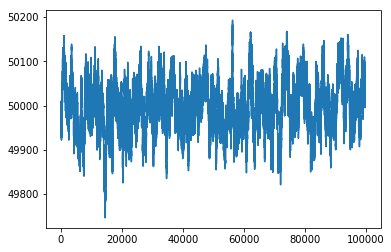

In [101]:
plt.plot(t,m)

In [9]:
file = np.load('./flow_a-l_1.2-time_27.78hr_CAT-analysis.npy').item()

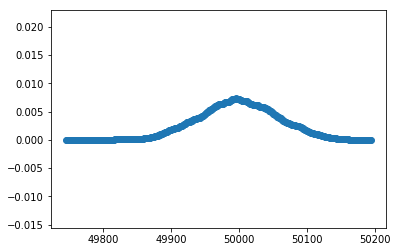

In [12]:
plt.scatter(*file['m_pdf'].T)

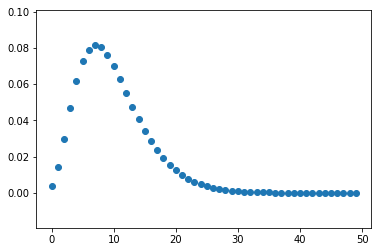

In [13]:
plt.scatter(*file['n_pdf'].T)

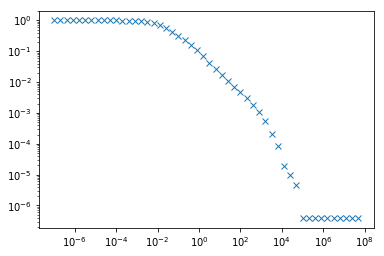

In [16]:
plt.loglog(*file['rt_cdf'].T,'x')